# Depth Perception

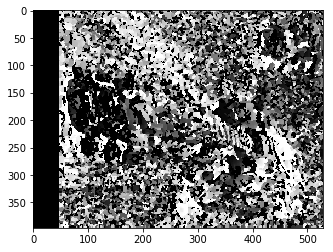

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('depthmap_guitar_left.jpg',0)
imgR = cv2.imread('depthmap_guitar_right.jpg',0)

stereo = cv2.StereoSGBM_create(minDisparity=16, numDisparities=32,blockSize=7)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

In [1]:
import numpy as np
import cv2

ply_header = '''ply
format ascii 1.0
element vertex %(vert_num)d
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
'''

# def write_ply(fn, verts, colors):
#     verts = verts.reshape(-1, 3)
#     colors = colors.reshape(-1, 3)
#     verts = np.hstack([verts, colors])
#     with open(fn, 'w') as f:
#         f.write(ply_header % dict(vert_num=len(verts)))
#         np.savetxt(f, verts, '%f %f %f %d %d %d')


if __name__ == '__main__':
    print ('loading images...')
#     imgL = cv2.pyrDown( cv2.imread('../gpu/aloeL.jpg') )  # downscale images for faster processing
#     imgR = cv2.pyrDown( cv2.imread('../gpu/aloeR.jpg') )

    # disparity range is tuned for 'aloe' image pair
    
    imgL = cv2.pyrDown( cv2.imread('depthmap_guitar_left.jpg') )
    imgR = cv2.pyrDown( cv2.imread('depthmap_guitar_right.jpg') )
    window_size = 7
    min_disp = 32
    num_disp = 112-min_disp
    stereo = cv2.StereoSGBM_create(minDisparity = min_disp,
        numDisparities = num_disp,
        blockSize = 6,
#         SADWindowSize = window_size,
        uniquenessRatio = 10,
        speckleWindowSize = 100,
        speckleRange = 32,
        disp12MaxDiff = 1,
        P1 = 8*3*window_size**2,
        P2 = 32*3*window_size**2,
#         fullDP = False
    )

    print ('computing disparity...')
    disp = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

    print ('generating 3d point cloud...')
    h, w = imgL.shape[:2]
    f = 0.8*w                          # guess for focal length
    Q = np.float32([[1, 0, 0, -0.5*w],
                    [0,-1, 0,  0.5*h], # turn points 180 deg around x-axis,
                    [0, 0, 0,     -f], # so that y-axis looks up
                    [0, 0, 1,      0]])
    points = cv2.reprojectImageTo3D(disp, Q)
    colors = cv2.cvtColor(imgL, cv2.COLOR_BGR2RGB)
    mask = disp > disp.min()
    out_points = points[mask]
    out_colors = colors[mask]
    out_fn = 'out.ply'
#     write_ply('out.ply', out_points, out_colors)
#     print ('%s saved' % 'out.ply')

    cv2.imshow('left', imgL)
#     cv2.imshow('disparity', (disp-min_disp)/num_disp)
    cv2.imshow('disparity', disp/num_disp)
    cv2.waitKey()
    cv2.destroyAllWindows()

loading images...
computing disparity...
generating 3d point cloud...


In [2]:
import cv2
help(cv2)

Help on module cv2:

NAME
    cv2 - Python wrapper for OpenCV.

SUBMODULES
    Error
    aruco
    bgsegm
    bioinspired
    datasets
    detail
    face
    fisheye
    flann
    line_descriptor
    ml
    motempl
    multicalib
    ocl
    ogl
    omnidir
    optflow
    ppf_match_3d
    rgbd
    text
    videostab
    xfeatures2d
    ximgproc
    xphoto

CLASSES
    builtins.Exception(builtins.BaseException)
        error
    
    class error(builtins.Exception)
     |  Common base class for all non-exit exceptions.
     |  
     |  Method resolution order:
     |      error
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
     |  
     |  Data descriptors defined here:
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from builtins.Exception:
     |  
     |  __init__(self, /, *args,